In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\100 Days machine learning\Bagging part 1\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
 df=df.iloc[:,1:]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()

In [8]:
df['Species']=encoder.fit_transform(df['Species'])

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df=df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

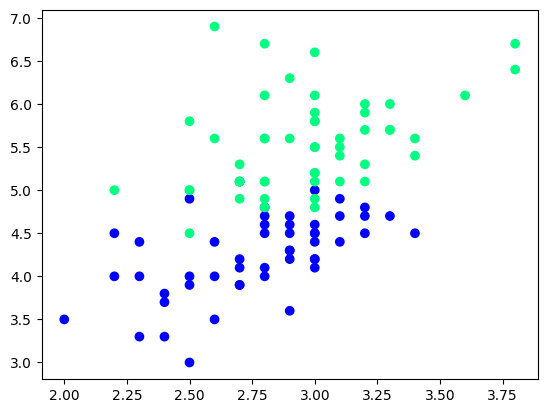

In [17]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [18]:
df=df.sample(100)

In [21]:
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [22]:
df_train

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
135,3.0,6.1,2
107,2.9,6.3,2
53,2.3,4.0,1
50,3.2,4.7,1
71,2.8,4.0,1
68,2.2,4.5,1
112,3.0,5.5,2
142,2.7,5.1,2
95,3.0,4.2,1


In [23]:
df_val

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
57,2.4,3.3,1
143,3.2,5.9,2
134,2.6,5.6,2
76,2.8,4.8,1


In [24]:
df_test

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
79,2.6,3.5,1
51,3.2,4.5,1
70,3.2,4.8,1
148,3.4,5.4,2


In [29]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [30]:
X_test

array([[2.9, 4.6],
       [2.4, 3.3],
       [3.2, 5.9],
       [2.6, 5.6],
       [2.8, 4.8]])

In [31]:
y_test

array([1, 1, 2, 2, 1])

# Case -1 Bagging

In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
112,3.0,5.5,2
107,2.9,6.3,2
135,3.0,6.1,2
135,3.0,6.1,2
107,2.9,6.3,2
53,2.3,4.0,1
50,3.2,4.7,1
135,3.0,6.1,2


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [36]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [37]:
dt_bag1 = DecisionTreeClassifier()

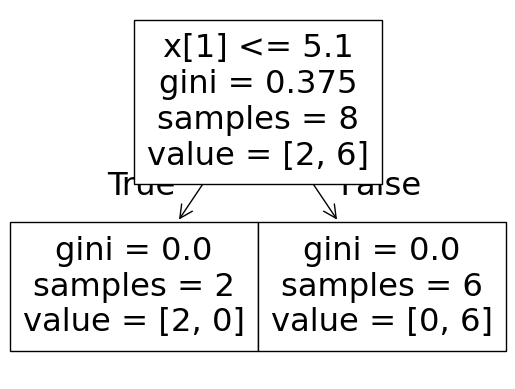

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


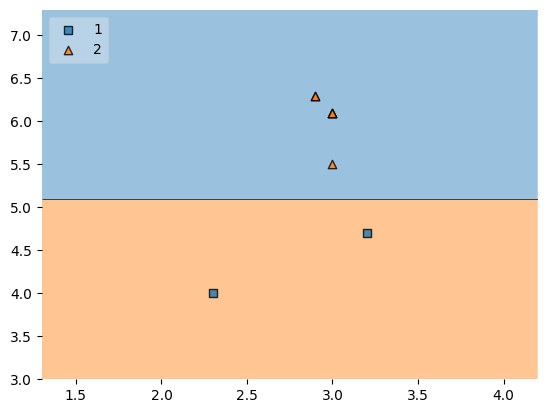

In [38]:
evaluate(dt_bag1,X,y)

In [39]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
135,3.0,6.1,2
53,2.3,4.0,1
142,2.7,5.1,2
71,2.8,4.0,1
53,2.3,4.0,1
95,3.0,4.2,1
53,2.3,4.0,1


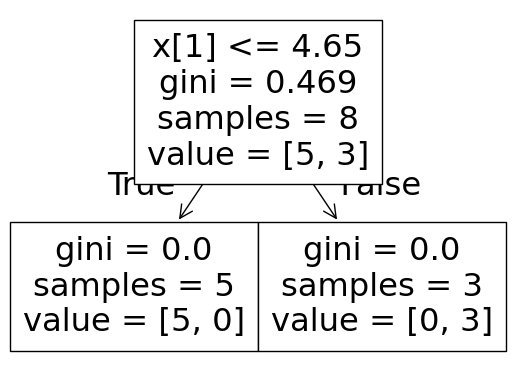

C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


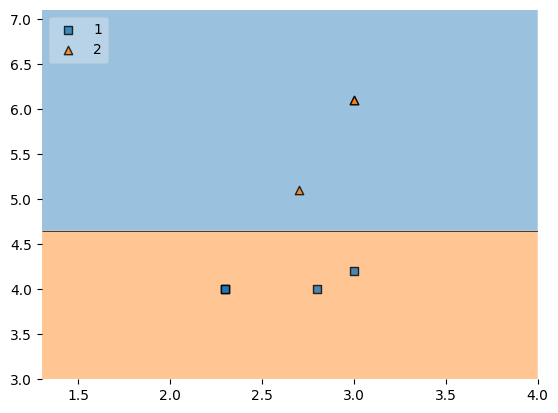

In [43]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [44]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
68,2.2,4.5,1
95,3.0,4.2,1
107,2.9,6.3,2
94,2.7,4.2,1
50,3.2,4.7,1
71,2.8,4.0,1
53,2.3,4.0,1


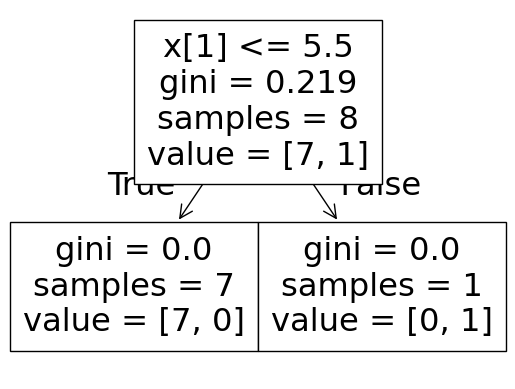

1.0


C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


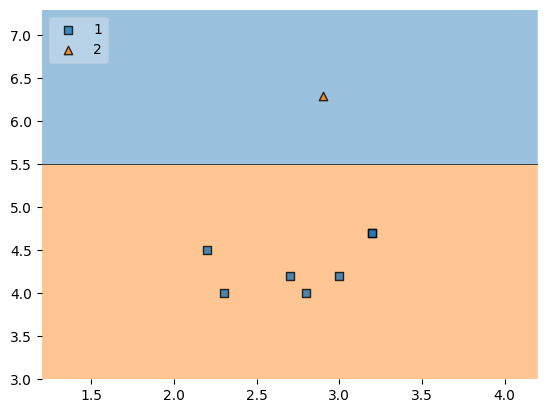

In [45]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [46]:
df_test

,SepalWidthCm,PetalLengthCm,Species
109,3.6,6.1,2
79,2.6,3.5,1
51,3.2,4.5,1
70,3.2,4.8,1
148,3.4,5.4,2


In [49]:
print("Predictor 1",dt_bag1.predict(np.array([3.2,4.8]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2,4.8]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2,4.8]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# 3 types of bagging


## 1- pasting
here also will do raw sample just like above we did but just with Replace = False

In [50]:
df_train

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
135,3.0,6.1,2
107,2.9,6.3,2
53,2.3,4.0,1
50,3.2,4.7,1
71,2.8,4.0,1
68,2.2,4.5,1
112,3.0,5.5,2
142,2.7,5.1,2
95,3.0,4.2,1


In [51]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
107,2.9,6.3,2
135,3.0,6.1,2
53,2.3,4.0,1
71,2.8,4.0,1
94,2.7,4.2,1
50,3.2,4.7,1
112,3.0,5.5,2


## 2-Random Subspaces

In [52]:
df1=pd.read_csv(r"D:\100 Days machine learning\Bagging part 1\Iris.csv")

In [57]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,SepalLengthCm
0,5.1,5.1
1,4.9,4.9
2,4.7,4.7
3,4.6,4.6
4,5.0,5.0
...,...,...
145,6.7,6.7
146,6.3,6.3
147,6.5,6.5
148,6.2,6.2


# Random Patches

In [60]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,Id
14,Iris-setosa,15
114,Iris-virginica,115
63,Iris-versicolor,64
14,Iris-setosa,15
122,Iris-virginica,123
42,Iris-setosa,43
83,Iris-versicolor,84
96,Iris-versicolor,97
